In [37]:
import pandas as pd
import numpy as np

In [38]:
train_df = pd.read_csv("processedcleveland.xlxs")
train_df.head()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [39]:
def catg(x):
    if x == 0:
        return x
    if x ==1:
        return x
    if x ==2:
        return 1
    if x==3:
        return 1
    if x==4:
        return 1

In [40]:
train_df['num'] = train_df['num'].apply(lambda x: catg(x))

In [41]:
def replace_q(x):
    if x == '?':
        x = 0
    else:
        return x

In [42]:
train_df['thal'] = train_df['thal'].apply(lambda x : replace_q(x))

In [43]:
train_df['ca'] = train_df['ca'].apply(lambda x : replace_q(x))
train_df['slope'] = train_df['slope'].apply(lambda x : replace_q(x))
train_df['oldpeak'] = train_df['oldpeak'].apply(lambda x : replace_q(x))
train_df['exang'] = train_df['exang'].apply(lambda x : replace_q(x))
train_df['thalach'] = train_df['thalach'].apply(lambda x : replace_q(x))

train_df['restecg'] = train_df['restecg'].apply(lambda x : replace_q(x))

train_df['fbs'] = train_df['fbs'].apply(lambda x : replace_q(x))

train_df['cholestrol'] = train_df['cholestrol'].apply(lambda x : replace_q(x))
train_df['trestbps'] = train_df['trestbps'].apply(lambda x : replace_q(x))

train_df['cp'] = train_df['cp'].apply(lambda x : replace_q(x))

In [44]:
train_df['trestbps'] = train_df['trestbps'].fillna('0')
train_df['cholestrol'] = train_df['cholestrol'].fillna('0')
train_df['fbs'] = train_df['fbs'].fillna('0')
train_df['restecg'] = train_df['restecg'].fillna('0')
train_df['thalach'] = train_df['thalach'].fillna('0')
train_df['exang'] = train_df['exang'].fillna('0')
train_df['oldpeak'] = train_df['oldpeak'].fillna('0')
train_df['slope'] = train_df['slope'].fillna('0')
train_df['ca'] = train_df['ca'].fillna('0')
train_df['thal'] = train_df['thal'].fillna('0')
train_df['cp'] = train_df['cp'].fillna('0')

In [45]:
train_df.head()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


Heart Disease Present Percentage       : 54.12541254125413
Heart Disease Absent Percentage       : 45.87458745874587


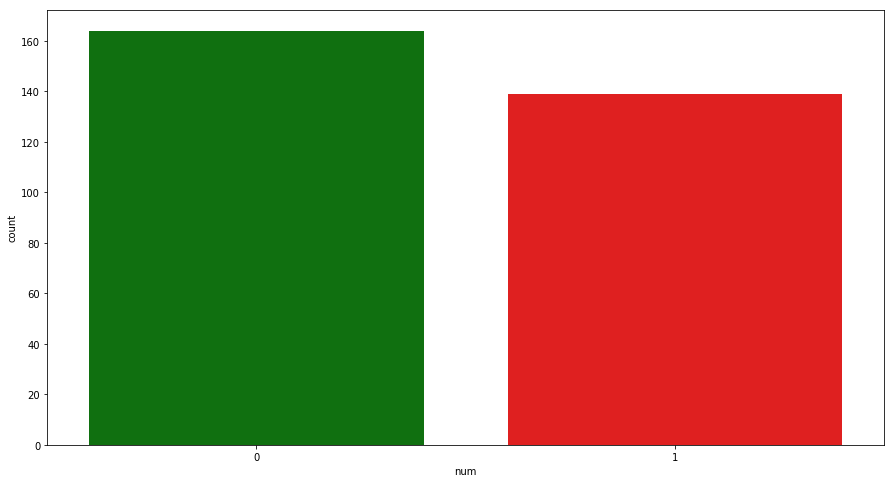

In [47]:
from matplotlib import pyplot as coplt
import seaborn as sb
plt_class = {0: 'green', 1: 'red'}
coplt.figure(figsize = (15, 8))

Disease_pres = len(train_df[train_df['num']==0])
Disease_abs = len(train_df[train_df['num']==1])
Disease_pres_percent = Disease_pres/(Disease_pres+Disease_abs)
print('Heart Disease Present Percentage       :', Disease_pres_percent*100)
Disease_abs_percent= Disease_abs/(Disease_pres+Disease_abs)
print('Heart Disease Absent Percentage       :', Disease_abs_percent*100)
ax = sb.countplot(x = 'num', data = train_df, palette = plot_class)
coplt.show()


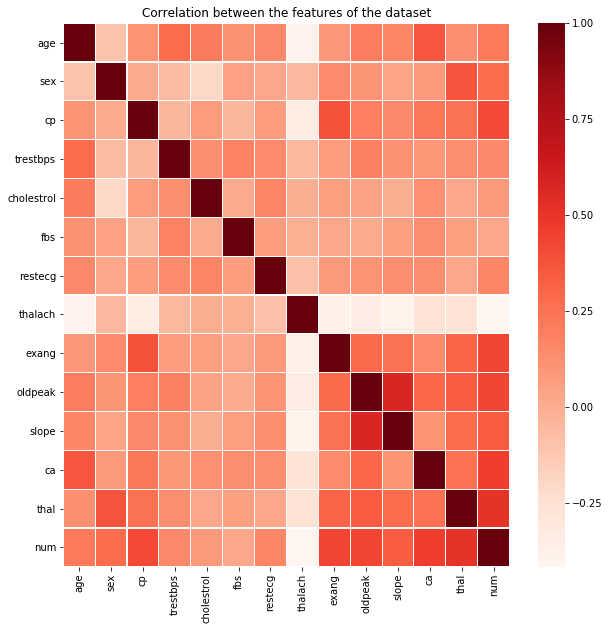

In [11]:
import numpy as np
train_df['ca'] = train_df['ca'].astype(np.int64)
train_df['thal'] = train_df['thal'].astype(np.int64)
coplt.figure(figsize = (10,10))
coplt.title('Correlation between the features of the dataset')
cor_train_df = train_df.corr()
sb.heatmap(cor_train_df,xticklabels=cor_train_df.columns,yticklabels=cor_train_df.columns,linewidths=.1,cmap="Reds")
coplt.show()

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age           303 non-null int64
sex           303 non-null int64
cp            303 non-null int64
trestbps      303 non-null int64
cholestrol    303 non-null int64
fbs           303 non-null int64
restecg       303 non-null int64
thalach       303 non-null int64
exang         303 non-null int64
oldpeak       303 non-null float64
slope         303 non-null int64
ca            303 non-null int64
thal          303 non-null int64
num           303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [13]:
ftcol = train_df.columns.difference(['num'])
train_df[ftcol].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
age           303 non-null int64
ca            303 non-null int64
cholestrol    303 non-null int64
cp            303 non-null int64
exang         303 non-null int64
fbs           303 non-null int64
oldpeak       303 non-null float64
restecg       303 non-null int64
sex           303 non-null int64
slope         303 non-null int64
thal          303 non-null int64
thalach       303 non-null int64
trestbps      303 non-null int64
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [14]:
train_df['num'] = train_df['num'].astype('category')

## __Train Test Split__

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train,test = train_test_split(train_df,test_size=0.3,random_state=42)
len(train)

212

In [17]:
features = train[ftcol].values
label = train['num'].values

### <font color=black>Grading Boosting Classifier</font>

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
gbc = GradientBoostingClassifier(n_estimators=1250,learning_rate=0.05,verbose=1,max_depth=10,max_features = 0.8,min_samples_leaf=4,random_state=0,subsample =0.9,max_leaf_nodes =30)

In [21]:
pred = gbc.fit(features, label)
pred = pred.predict(test[ftcol].values)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3082           0.0581            6.25s
         2           1.2392           0.0164            4.99s
         3           1.1874           0.0469            4.16s
         4           1.1223           0.0205            3.74s
         5           1.0716           0.0306            3.74s
         6           1.0336           0.0280            3.53s
         7           0.9804           0.0222            3.38s
         8           0.9306           0.0034            3.26s
         9           0.9007           0.0270            3.31s
        10           0.8670           0.0384            3.35s
        20           0.5851           0.0107            2.71s
        30           0.4122           0.0036            2.40s
        40           0.2859          -0.0075            1.92s
        50           0.2153          -0.0006            1.90s
        60           0.1524          -0.0025            1.88s
       

In [22]:
pd.options.mode.chained_assignment = None

In [23]:
test['predictgradient'] = pred

In [24]:
test.head()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,predictgradient
179,53,1,3,130,246,1,2,173,0,0.0,1,3,3,0,0
228,54,1,4,110,206,0,2,108,1,0.0,2,1,3,1,1
111,56,1,4,125,249,1,2,144,1,1.2,2,1,3,1,1
246,58,1,4,100,234,0,0,156,0,0.1,1,1,7,1,1
60,51,0,4,130,305,0,0,142,1,1.2,2,0,7,1,1


In [25]:
test['num'] = test['num'].astype('int')

In [26]:
from pandas_ml import ConfusionMatrix

In [27]:
cm = ConfusionMatrix(test['num'],test['predictgradient'])
cm

Predicted  False  True  __all__
Actual                         
False         41     7       48
True           8    35       43
__all__       49    42       91

In [28]:
cm.print_stats()

population: 91
P: 43
N: 48
PositiveTest: 42
NegativeTest: 49
TP: 35
TN: 41
FP: 7
FN: 8
TPR: 0.813953488372093
TNR: 0.8541666666666666
PPV: 0.8333333333333334
NPV: 0.8367346938775511
FPR: 0.14583333333333334
FDR: 0.16666666666666666
FNR: 0.18604651162790697
ACC: 0.8351648351648352
F1_score: 0.8235294117647058
MCC: 0.6690933822917784
informedness: 0.6681201550387597
markedness: 0.6700680272108843
prevalence: 0.4725274725274725
LRP: 5.581395348837209
LRN: 0.21781055019852524
DOR: 25.624999999999996
FOR: 0.16326530612244897


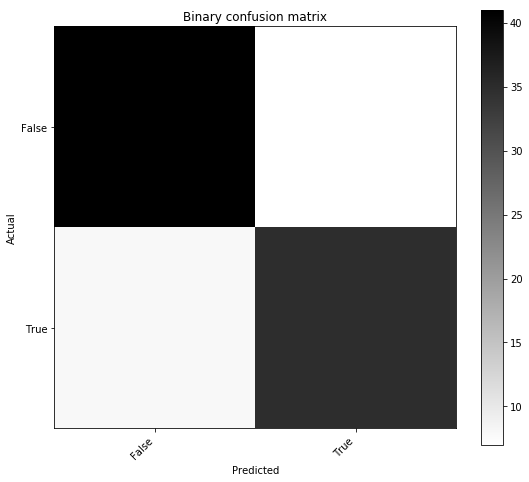

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
cm.plot()

## __Random Forest Classifier__

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=1500,random_state=42,max_depth=None,n_jobs=3,verbose=1)

In [32]:
predrfc = rfc.fit(features,label).predict(test[ftcol].values)

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:    0.3s finished


In [50]:
test['rfcPredict'] = predrfc
test.head()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,predictgradient,rfcPredict
179,53,1,3,130,246,1,2,173,0,0.0,1,3,3,0,0,0
228,54,1,4,110,206,0,2,108,1,0.0,2,1,3,1,1,1
111,56,1,4,125,249,1,2,144,1,1.2,2,1,3,1,1,1
246,58,1,4,100,234,0,0,156,0,0.1,1,1,7,1,1,1
60,51,0,4,130,305,0,0,142,1,1.2,2,0,7,1,1,1


In [51]:
cm11 = ConfusionMatrix(test['num'],test['rfcPredict'])
cm11

Predicted  False  True  __all__
Actual                         
False         42     6       48
True           7    36       43
__all__       49    42       91

In [52]:
cm11.print_stats()

population: 91
P: 43
N: 48
PositiveTest: 42
NegativeTest: 49
TP: 36
TN: 42
FP: 6
FN: 7
TPR: 0.8372093023255814
TNR: 0.875
PPV: 0.8571428571428571
NPV: 0.8571428571428571
FPR: 0.125
FDR: 0.14285714285714285
FNR: 0.16279069767441862
ACC: 0.8571428571428571
F1_score: 0.8470588235294118
MCC: 0.7132467526968196
informedness: 0.7122093023255816
markedness: 0.7142857142857142
prevalence: 0.4725274725274725
LRP: 6.6976744186046515
LRN: 0.186046511627907
DOR: 36.0
FOR: 0.14285714285714285


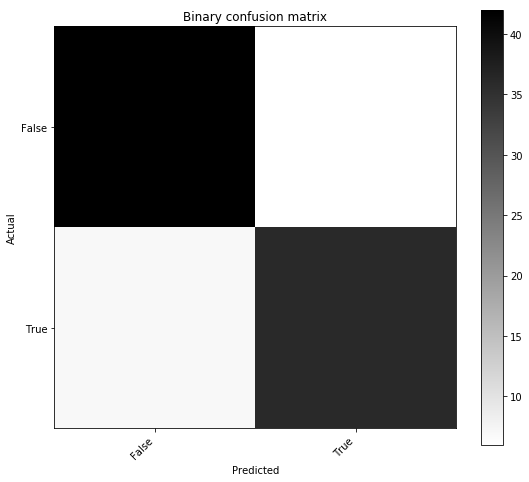

In [53]:
cm11.plot()

Heart Disease Present Percentage       : 53.84615384615385
Heart Disease Absent Percentage       : 46.15384615384615


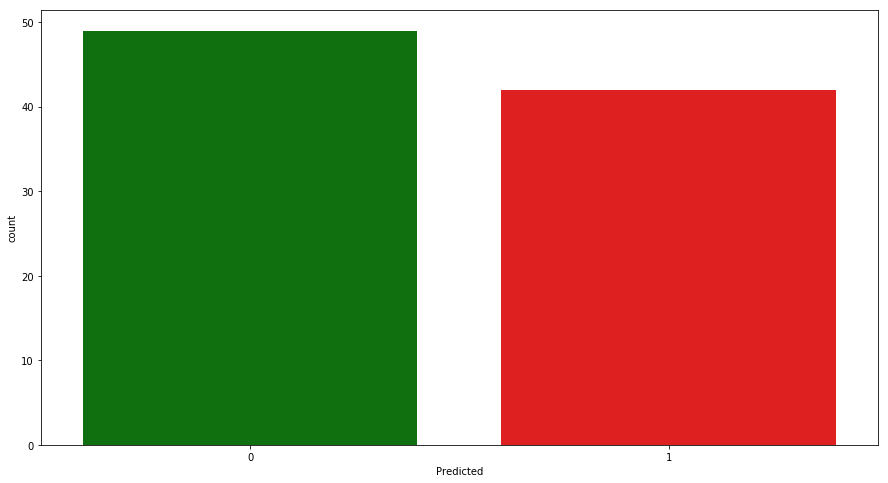

In [54]:
plt_class1 = {0: 'green', 1: 'red'}
coplt.figure(figsize = (15, 8))

Disease_pres = len(test[test['rfcPredict']==0])
Disease_abs = len(test[test['rfcPredict']==1])
Disease_pres_percent = Disease_pres/(Disease_pres+Disease_abs)
print('Heart Disease Present Percentage       :', Disease_pres_percent*100)
Disease_abs_percent= Disease_abs/(Disease_pres+Disease_abs)
print('Heart Disease Absent Percentage       :', Disease_abs_percent*100)
ax = sb.countplot(x = 'rfcPredict', data = test, palette = plt_class1)
coplt.show()


## __Neural Network__

In [51]:
from keras.models import Sequential

In [52]:
from keras.layers import Dropout

In [53]:
from keras.layers import Dense

In [54]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu',kernel_initializer='normal'))
model.add(Dense(11, input_dim=13, activation='relu',kernel_initializer='normal'))

model.add(Dropout(0.2))
model.add(Dense(7, activation='linear',kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dropout(0.2))

model.add(Dense(2, input_dim=13, activation='relu',kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='normal'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
model.fit(features,label,epochs=500)

Epoch 1/500
212/212 [==============================] - 0s 90us/step - loss: 0.4278 - acc: 0.8066
Epoch 2/500
212/212 [==============================] - 0s 104us/step - loss: 0.4108 - acc: 0.7972
Epoch 3/500
212/212 [==============================] - 0s 80us/step - loss: 0.3762 - acc: 0.8208
Epoch 4/500
212/212 [==============================] - 0s 104us/step - loss: 0.3470 - acc: 0.8396
Epoch 5/500
212/212 [==============================] - 0s 90us/step - loss: 0.3408 - acc: 0.8443
Epoch 6/500
212/212 [==============================] - 0s 118us/step - loss: 0.3440 - acc: 0.8302
Epoch 7/500
212/212 [==============================] - 0s 99us/step - loss: 0.3418 - acc: 0.8726
Epoch 8/500
212/212 [==============================] - 0s 94us/step - loss: 0.3720 - acc: 0.8255
Epoch 9/500
212/212 [==============================] - 0s 104us/step - loss: 0.3526 - acc: 0.8443
Epoch 10/500
212/212 [==============================] - 0s 104us/step - loss: 0.3930 - acc: 0.8349
Epoch 11/500
212/212 [==

212/212 [==============================] - 0s 99us/step - loss: 0.3200 - acc: 0.8302
Epoch 167/500
212/212 [==============================] - 0s 94us/step - loss: 0.3133 - acc: 0.8632
Epoch 168/500
212/212 [==============================] - 0s 85us/step - loss: 0.3167 - acc: 0.8679
Epoch 169/500
212/212 [==============================] - 0s 90us/step - loss: 0.3298 - acc: 0.8396
Epoch 170/500
212/212 [==============================] - 0s 113us/step - loss: 0.2993 - acc: 0.8679
Epoch 171/500
212/212 [==============================] - 0s 104us/step - loss: 0.3486 - acc: 0.8538
Epoch 172/500
212/212 [==============================] - 0s 94us/step - loss: 0.3176 - acc: 0.8585
Epoch 173/500
212/212 [==============================] - 0s 104us/step - loss: 0.3572 - acc: 0.8302
Epoch 174/500
212/212 [==============================] - 0s 90us/step - loss: 0.3286 - acc: 0.8632
Epoch 175/500
212/212 [==============================] - 0s 94us/step - loss: 0.3325 - acc: 0.8491
Epoch 176/500
212/212

212/212 [==============================] - 0s 85us/step - loss: 0.3689 - acc: 0.8302
Epoch 331/500
212/212 [==============================] - 0s 85us/step - loss: 0.3102 - acc: 0.8821
Epoch 332/500
212/212 [==============================] - 0s 104us/step - loss: 0.2792 - acc: 0.8774
Epoch 333/500
212/212 [==============================] - 0s 80us/step - loss: 0.2791 - acc: 0.8726
Epoch 334/500
212/212 [==============================] - 0s 85us/step - loss: 0.3266 - acc: 0.8821
Epoch 335/500
212/212 [==============================] - 0s 90us/step - loss: 0.3060 - acc: 0.8491
Epoch 336/500
212/212 [==============================] - 0s 99us/step - loss: 0.2942 - acc: 0.8774
Epoch 337/500
212/212 [==============================] - 0s 113us/step - loss: 0.3093 - acc: 0.8491
Epoch 338/500
212/212 [==============================] - 0s 104us/step - loss: 0.2998 - acc: 0.8585
Epoch 339/500
212/212 [==============================] - 0s 109us/step - loss: 0.2822 - acc: 0.9009
Epoch 340/500
212/21

212/212 [==============================] - 0s 85us/step - loss: 0.3217 - acc: 0.8774
Epoch 495/500
212/212 [==============================] - 0s 90us/step - loss: 0.3320 - acc: 0.8632
Epoch 496/500
212/212 [==============================] - 0s 94us/step - loss: 0.2973 - acc: 0.8679
Epoch 497/500
212/212 [==============================] - 0s 99us/step - loss: 0.2814 - acc: 0.8632
Epoch 498/500
212/212 [==============================] - 0s 113us/step - loss: 0.2774 - acc: 0.8726
Epoch 499/500
212/212 [==============================] - 0s 76us/step - loss: 0.2727 - acc: 0.8774
Epoch 500/500
212/212 [==============================] - 0s 94us/step - loss: 0.2696 - acc: 0.8915


In [59]:
from keras.models import load_model
model.save('heart_model_new.h5')

In [60]:
model1 = load_model('heart_model_new.h5')
deeppred = model1.predict_classes(test[ftcol].values)
test['keras'] = deeppred

In [61]:
cmk = ConfusionMatrix(test['num'],test['keras'])
cmk

Predicted  False  True  __all__
Actual                         
False         36    12       48
True           7    36       43
__all__       43    48       91

In [63]:
cmk.print_stats()

population: 91
P: 43
N: 48
PositiveTest: 48
NegativeTest: 43
TP: 36
TN: 36
FP: 12
FN: 7
TPR: 0.8372093023255814
TNR: 0.75
PPV: 0.75
NPV: 0.8372093023255814
FPR: 0.25
FDR: 0.25
FNR: 0.16279069767441862
ACC: 0.7912087912087912
F1_score: 0.7912087912087912
MCC: 0.5872093023255814
informedness: 0.5872093023255816
markedness: 0.5872093023255816
prevalence: 0.4725274725274725
LRP: 3.3488372093023258
LRN: 0.2170542635658915
DOR: 15.428571428571427
FOR: 0.16279069767441862


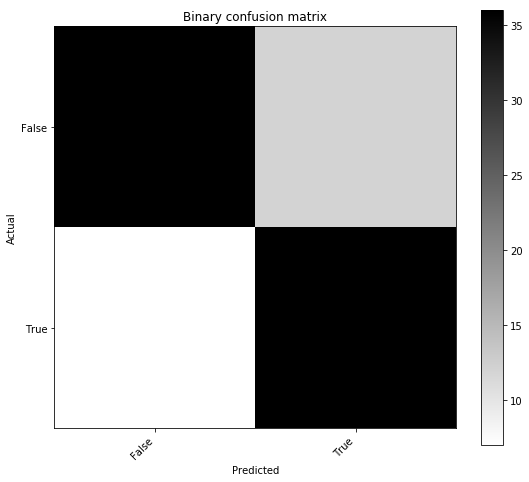

In [64]:
cmk.plot()